<a href="https://colab.research.google.com/github/anuva05/PracticalDeepLearningCourse/blob/master/Lesson1_pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash
  

Updating fastai...
Done.


Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [0]:
%reload_ext autoreload  
%autoreload 2
%matplotlib inline

we import all the necessary packages. We are going to work with the fastai V1 library which sits on top of Pytorch 1.0. The fast.ai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.
The following code will load data and enable us to visualize and understand our dataset.



In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
#importing data
path = untar_data(URLs.PETS); path
path_anno = path/'annotations'
path_img = path/'images'
#using fast.ai inbuilt function to get the image files
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_170.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_2.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_139.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_120.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_150.jpg')]

37

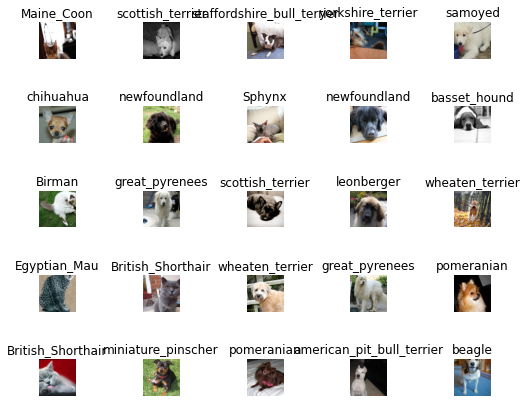

In [0]:
np.random.seed(2)
#Notice that labels of the pets in the image are a part of the filename. Extract that
pat = r'/([^/]+)_\d+.jpg$'  
#fast.ai dataBunch object is returned. Contains training data, creates validation data and optionally 
#also contains test data. Also contains labels. 
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
#Each image channel should have mean=0 and std=1 for best results
data.normalize(imagenet_stats)
data.show_batch(row=3, figsize=(7,6))
#Number of classes present and what they are:
data.c 
print(data.classes)

Now, start training the model. We are using a CNN backbone and a fully connected head with a single hidden layer as a classifier. We will train for 5 epochs. We will use cnn_learner(learning to use the fast.ai library). We are using a transfer learning approach by using a pre-trained model (resnet34) trained on ImageNet. This allows us to train models for a specific task (recognize pets) much faster than if we did it from scratch. 

In [12]:
learn= cnn_learner(data, models.resnet34, metrics=error_rate)
#Train. The argument to fit_one_cycle() tells us how many times the model is 
#seeing a particular sample. Start out with 4, see how it goes
learn.fit_one_cycle(4) 

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.353990,0.354109,0.117050,33:04
1,0.610739,0.318206,0.102842,33:07
2,0.392126,0.270401,0.093369,33:07
3,0.280603,0.257615,0.081867,33:03


We have just finished training our model!
ResNet tends to work pretty well for this task. To save the weights learned by the model, use the following command.
Side note: this was a practical introduction to training using fast.ai. The architecture of the model comes into picture when, for example, we want to do edge computing and the size of the model matters.

In [0]:
  learn.save('stage-1')

**Analysis of results**

We can see which were the categories that the model most confused with one another. This is an indicator that our classifier is working correctly.
The confusion matrix shows that the distribution is heavily skewed. This means that the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

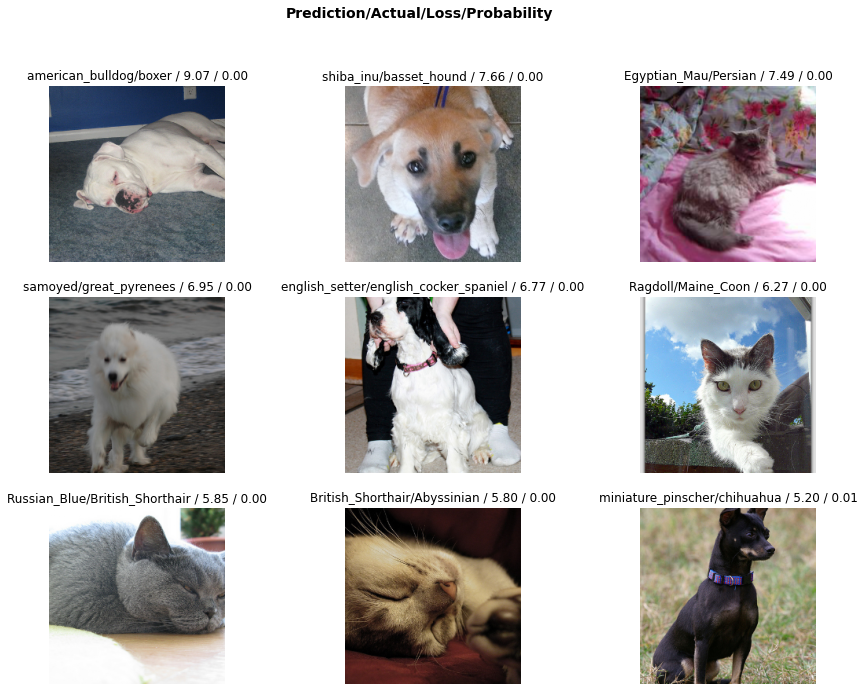

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

#Plot top losses
interp.plot_top_losses(9, figsize=(15,11))


[('British_Shorthair', 'Russian_Blue', 6),
 ('miniature_pinscher', 'chihuahua', 6),
 ('staffordshire_bull_terrier', 'american_bulldog', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Birman', 'Ragdoll', 4),
 ('Maine_Coon', 'Ragdoll', 4),
 ('Siamese', 'Birman', 4),
 ('boxer', 'american_bulldog', 4),
 ('Ragdoll', 'Birman', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('beagle', 'basset_hound', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('saint_bernard', 'american_bulldog', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Abyssinian', 'Sphynx', 2),
 ('Persian', 'British_Shorthair', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'chihuahua', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('english_cocker_spaniel', 'newfoundland', 2),
 ('shiba_inu', 'chihuahua', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terri

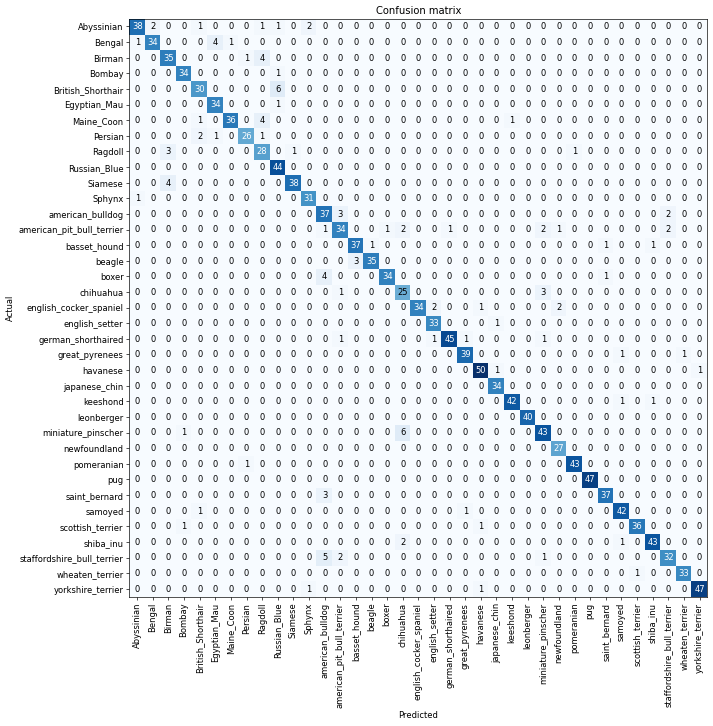

In [15]:
#Confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

#Most confused
interp.most_confused(min_val=2)